In [16]:
import pandas as pd
df = pd.read_csv("D:\\AIML\\Term 2\\Advanced Python AI and ML Tools\\Activities\\Practice_File.csv",usecols=["LotArea","SalePrice"])

In [17]:
df.head()

,LotArea,SalePrice
0,8450,208500
1,9600,181500
2,11250,223500
3,9550,140000
4,14260,250000


In [18]:
df.shape

(1460, 2)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LotArea    1460 non-null   int64
 1   SalePrice  1460 non-null   int64
dtypes: int64(2)
memory usage: 22.9 KB


In [20]:
df.isnull().sum()

LotArea      0
SalePrice    0
dtype: int64

In [21]:
df.describe()

,LotArea,SalePrice
count,1460.000000,1460.000000
mean,10516.828082,180921.195890
std,9981.264932,79442.502883
min,1300.000000,34900.000000
25%,7553.500000,129975.000000
50%,9478.500000,163000.000000
75%,11601.500000,214000.000000
max,215245.000000,755000.000000


In [22]:
q1 = df["SalePrice"].quantile(0.25)
q3 = df["SalePrice"].quantile(0.75)

In [23]:
IQR = q3-q1

In [24]:
print("q1 : {}, q3 : {}, IQR : {}".format(q1,q3,IQR))

q1 : 129975.0, q3 : 214000.0, IQR : 84025.0


In [26]:
lower_Whisker =q1 - (1.5*IQR)
upper_Whisker =q3 + (1.5*IQR)
print("Upper Whisker :",upper_Whisker)
print("Lower Whisker :",lower_Whisker)

Upper Whisker : 340037.5
Lower Whisker : 3937.5


In [27]:
print((df["SalePrice"]<lower_Whisker) |(df["SalePrice"]>upper_Whisker))

0       False
1       False
2       False
3       False
4       False
        ...  
1455    False
1456    False
1457    False
1458    False
1459    False
Name: SalePrice, Length: 1460, dtype: bool


In [28]:
new_df = df[((df["SalePrice"]>lower_Whisker) & (df["SalePrice"]<upper_Whisker))]

In [29]:
new_df.shape

(1399, 2)

In [30]:
q11 = df["SalePrice"].quantile(0.20)
q13 = df["SalePrice"].quantile(0.60)

lower_Whisker =q11 - (1.5*IQR)
upper_Whisker =q13 + (1.5*IQR)
print("Upper Whisker :",upper_Whisker)
print("Lower Whisker :",lower_Whisker)
print((df["SalePrice"]<lower_Whisker) |(df["SalePrice"]>upper_Whisker))
new_df1 = df[((df["SalePrice"]>lower_Whisker) & (df["SalePrice"]<upper_Whisker))]
print(new_df1.shape)

Upper Whisker : 305317.5
Lower Whisker : -2037.5
0       False
1       False
2       False
3       False
4       False
        ...  
1455    False
1456    False
1457    False
1458    False
1459    False
Name: SalePrice, Length: 1460, dtype: bool
(1351, 2)


{'whiskers': [<matplotlib.lines.Line2D at 0x242e3af5950>,
 'caps': [<matplotlib.lines.Line2D at 0x242e43001d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x242e42c9790>],
 'medians': [<matplotlib.lines.Line2D at 0x242e4424bd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x242e4425690>],
 'means': []}

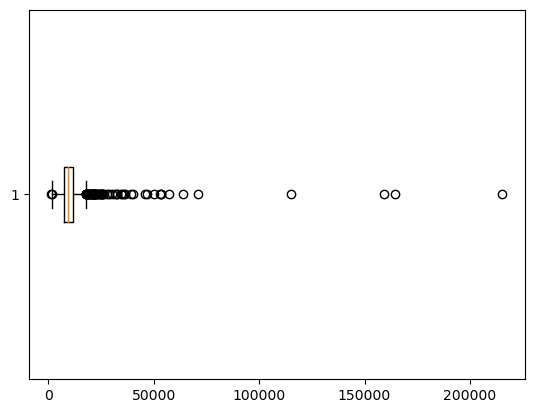

In [31]:
import matplotlib.pyplot as plt
plt.boxplot(df["LotArea"],vert=False)

<Axes: >

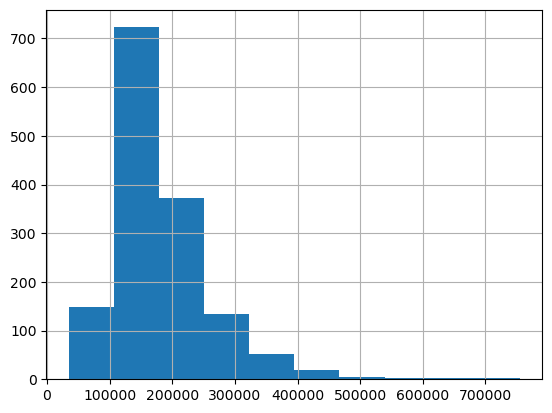

In [32]:
df["SalePrice"].hist()

Text(0, 0.5, 'Sales Price')

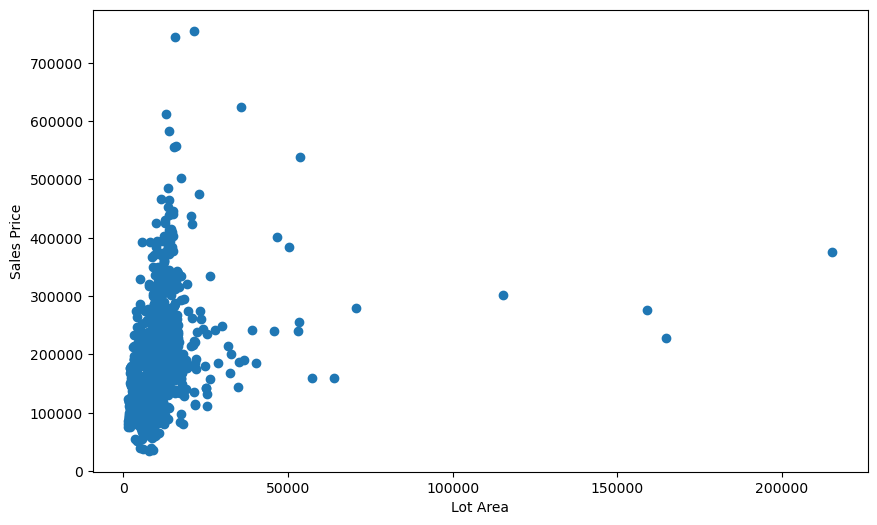

In [33]:
fig,ax = plt.subplots(figsize=(10,6))
ax.scatter(df["LotArea"],df["SalePrice"])
ax.set_xlabel("Lot Area")
ax.set_ylabel("Sales Price")

In [49]:
floor =(df["SalePrice"].quantile(0.01))
cap =(df["SalePrice"].quantile(0.95))
print("Floor :",floor)
print("Cap :",cap)

Floor : 61815.97
Cap : 326099.9999999999


In [50]:
df1=df.copy()
df1["SalePrice"]=np.where(df1["SalePrice"]<floor,floor,df1["SalePrice"])
df1["SalePrice"]=np.where(df1["SalePrice"]>cap,cap,df1["SalePrice"])

{'whiskers': [<matplotlib.lines.Line2D at 0x242e4553a50>,
 'caps': [<matplotlib.lines.Line2D at 0x242e455d010>,
 'boxes': [<matplotlib.lines.Line2D at 0x242e4552dd0>],
 'medians': [<matplotlib.lines.Line2D at 0x242e455e650>],
 'fliers': [<matplotlib.lines.Line2D at 0x242e455f110>],
 'means': []}

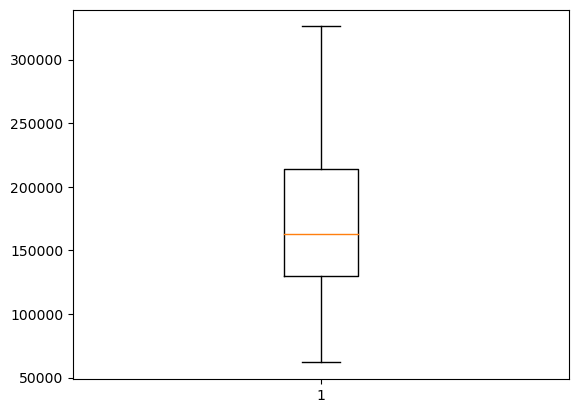

In [51]:
plt.boxplot(df1["SalePrice"])

In [57]:
df2 =df.copy()
print(df2.shape)
index = df2[(df2["SalePrice"]<lower_Whisker) | (df["SalePrice"]>upper_Whisker)].index
print(index.shape)

(1460, 3)
(109,)


In [54]:
print(df["SalePrice"].skew().round(2))

1.88


In [55]:
df["log_sale"] = df["SalePrice"].map(lambda i: np.log(i) if i>0 else 0)
print(df["log_sale"].skew().round(2))

0.12


(array([  4.,   1.,   0.,   5.,   7.,   6.,  26.,  45.,  47., 114., 165.,
        215., 172., 199., 119., 109.,  88.,  52.,  35.,  26.,  12.,   5.,
          4.,   2.,   2.]),
 array([10.46024211, 10.58321134, 10.70618058, 10.82914982, 10.95211906,
        11.07508829, 11.19805753, 11.32102677, 11.443996  , 11.56696524,
        11.68993448, 11.81290371, 11.93587295, 12.05884219, 12.18181142,
        12.30478066, 12.4277499 , 12.55071913, 12.67368837, 12.79665761,
        12.91962684, 13.04259608, 13.16556532, 13.28853455, 13.41150379,
        13.53447303]),
 <BarContainer object of 25 artists>)

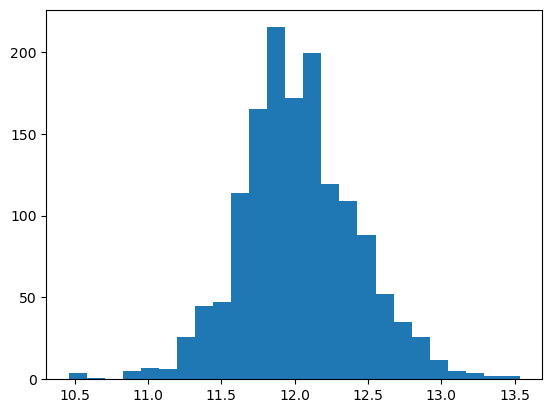

In [62]:
plt.hist(df2["log_sale"],bins=25)

(array([ 16.,  74., 184., 345., 252., 199., 125.,  85.,  61.,  38.,  27.,
         15.,  14.,   8.,   6.,   2.,   1.,   1.,   2.,   1.,   2.,   0.,
          0.,   0.,   2.]),
 array([ 34900.,  63704.,  92508., 121312., 150116., 178920., 207724.,
        236528., 265332., 294136., 322940., 351744., 380548., 409352.,
        438156., 466960., 495764., 524568., 553372., 582176., 610980.,
        639784., 668588., 697392., 726196., 755000.]),
 <BarContainer object of 25 artists>)

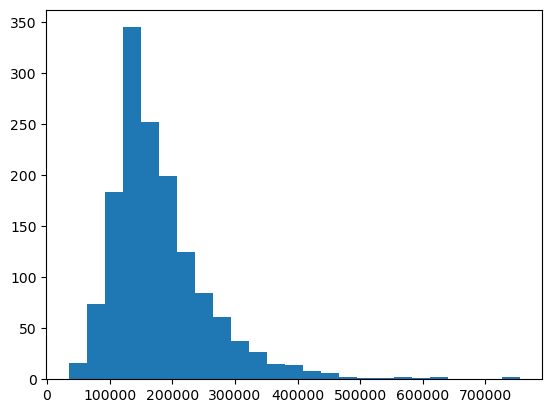

In [60]:
plt.hist(df2["SalePrice"],bins=25)

In [70]:
from sklearn.preprocessing import Binarizer
age = np.array([[6],[12],[20],[36],[65]])
binarizer = Binarizer(threshold=18)
binarizer.fit_transform(age)

array([[0],
       [0],
       [1],
       [1],
       [1]])

In [73]:
age = np.array([[18],[12],[20],[36],[65]])
binarizer = Binarizer(threshold=18)
binarizer.fit_transform(age)

array([[0],
       [0],
       [1],
       [1],
       [1]])

In [74]:
np.digitize(age,bins=[20,30.64])

array([[0],
       [0],
       [1],
       [2],
       [2]], dtype=int64)

### MinMax Scalar

In [6]:
import numpy as np
from sklearn import preprocessing

In [8]:
feature = np.array([[-500.5],[-100.1],[0],[100.1],[900.9]])

In [9]:
minMax_scale = preprocessing.MinMaxScaler(feature_range=(0,1))

In [10]:
scaled_feature = minMax_scale.fit_transform(feature)

In [11]:
scaled_feature

array([[0.        ],
       [0.28571429],
       [0.35714286],
       [0.42857143],
       [1.        ]])

### standard Scalar

In [12]:
scalar = preprocessing.StandardScaler()

In [13]:
standardized = scalar.fit_transform(feature)

In [14]:
standardized

array([[-1.26687088],
       [-0.39316683],
       [-0.17474081],
       [ 0.0436852 ],
       [ 1.79109332]])